In [5]:
setwd('C:/Users/sprot/Documents/R/titanic')
library(missForest)
library(sjPlot)
library(tidyverse)
library(Hmisc)
library(stringr)
library(scales)
train = read.csv('train.csv')
test = read.csv('test.csv')
full  = bind_rows(train, test)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning mess

In [6]:
summary(train)
summary(test)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

In [7]:
#some exploratory analysis:
summary(train)
summary(test)

mean(train$Survived)

sum(is.na(train$Age))

sum(is.na(train))

quantile(train$Fare, na.rm = T)
quantile(train$Age, na.rm = T)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

[1] 0.3838384

[1] 177

[1] 177

0%      25%      50%      75%     100% 
  0.0000   7.9104  14.4542  31.0000 512.3292

0%    25%    50%    75%   100% 
 0.420 20.125 28.000 38.000 80.000

In [8]:
cor(train$Age, train$Pclass, use = 'complete.obs') #does Age and Class have correlation?

[1] -0.369226

In [9]:
train$myCabinType = substr(train$Cabin, start = 1, stop = 1)
train$myCabinType = factor(train$myCabinType, ordered = T)  
is.factor(train$myCabinType)
is.ordered(train$myCabinType)
levels(train$myCabinType)
quantile(train$Age, na.rm = T)

[1] TRUE

[1] TRUE

[1] ""  "A" "B" "C" "D" "E" "F" "G" "T"

0%    25%    50%    75%   100% 
 0.420 20.125 28.000 38.000 80.000

In [11]:
#turn Age into groups:
train = train %>%
  mutate(myAgeGroup = case_when(Age <= 8 ~ 1,
    Age <= 15 ~ 2,
    Age <= 30 ~ 3,
    Age <= 45 ~ 4,
    Age <= 60 ~ 5,
    Age <= 200 ~ 6,
    TRUE ~ -1 ))


In [12]:
#binary variable: people travelling alone vs travelling with others
train = train %>%
  mutate(myTravelAlone = case_when( SibSp == 0 & Parch == 0 ~ TRUE,
   TRUE ~ FALSE))

In [13]:
train2 = train %>% #this is a simplified version of the dataset, that contains only columns that are used
  select(-c(Ticket, Parch, SibSp, Cabin, Embarked))

In [14]:
test2 = test %>%
  mutate(Survived = NA,
         myTravelAlone = case_when( SibSp == 0 & Parch == 0 ~ TRUE,
                                    TRUE ~ FALSE),
         myAgeGroup = case_when(Age <= 8 ~ 1,
                                Age <= 15 ~ 2,
                                Age <= 30 ~ 3,
                                Age <= 45 ~ 4,
                                Age <= 60 ~ 5,
                                Age <= 200 ~ 6,
                                TRUE ~ -1 ),
         myCabinType = substr(Cabin, start = 1, stop = 1))

test2$myCabinType = factor(test2$myCabinType, ordered = T)
levels(test2$myCabinType)

[1] ""  "A" "B" "C" "D" "E" "F" "G"

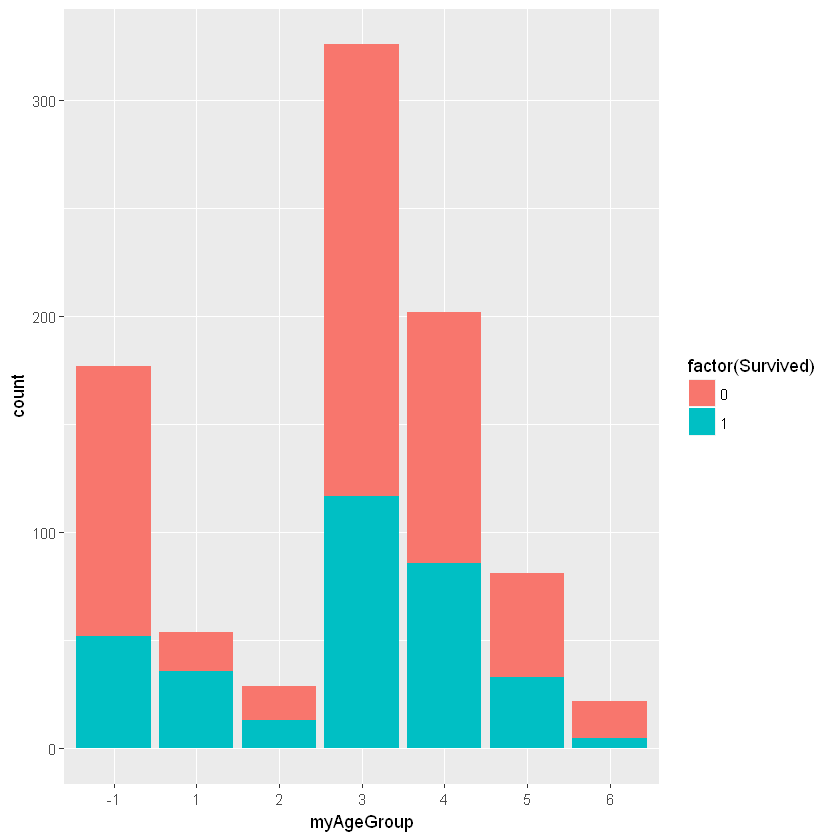

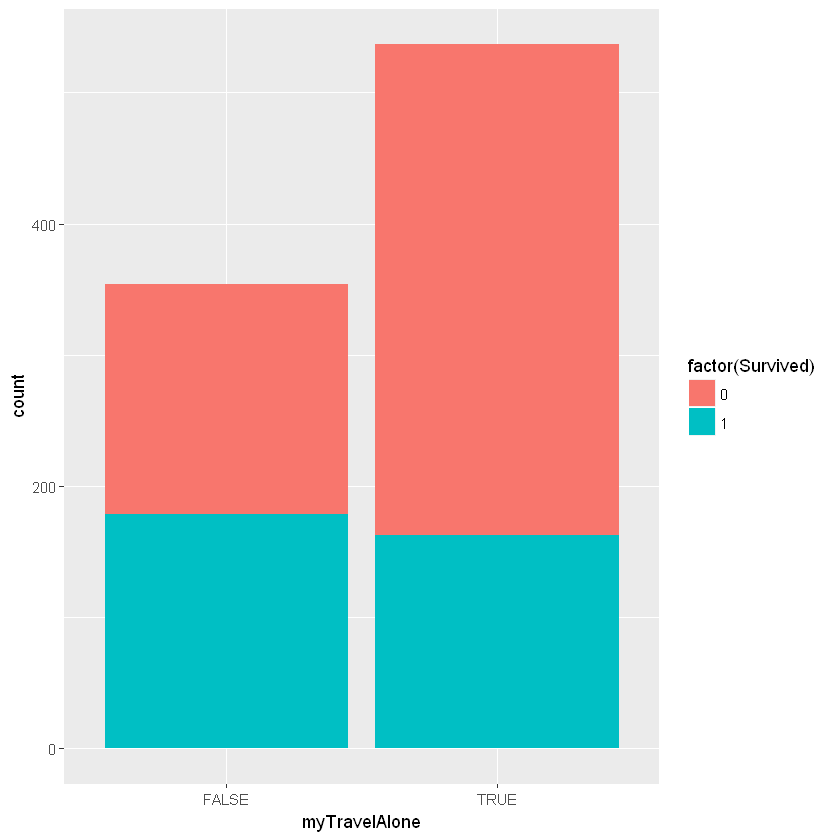

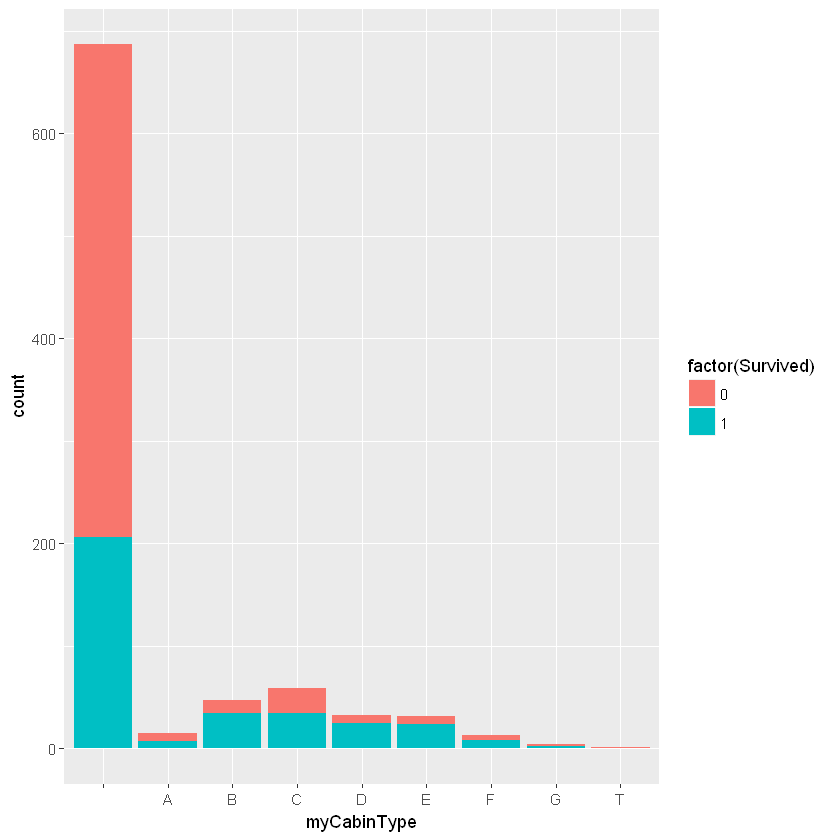

In [17]:
#visualizations
train$myAgeGroup = factor(train$myAgeGroup, ordered = T)

ggplot(data = train, mapping = aes(myAgeGroup, fill = factor(Survived))) +
  geom_bar()

ggplot(data = train, mapping = aes(myTravelAlone, fill = factor(Survived))) +
  geom_bar()


ggplot(data = train, mapping = aes(myCabinType, fill= factor(Survived))) +
  geom_bar()


In [20]:
set.seed(101)


myRf1 = randomForest(as.factor(Survived) ~ Pclass + Sex + Fare + myAgeGroup + myCabinType + myTravelAlone
                            , data = train2, importance= TRUE, proximity = TRUE,  na.action=na.exclude)


myPred1 = predict(myRf1, test2)
myPredDf = data.frame(PassengerID = test2$PassengerId, Survived = myPred1 )
myPredDf$Survived = as.factor(myPredDf$Survived)



myPred1 = as.integer(myPred1)
myPred1 = myPred1 - 1




write.csv(myPredDf, file = 'spyros_prot_titanic.csv', row.names = F)

ERROR: Error in data.frame(PassengerID = test2$PassengerId, Survived = myPred1): row names contain missing values
